### Modelagem matemático-computacional : Método LLS (Regressão linear)

Vamos introduzir um modelo simples e muito poderoso para o estudo de dados: A regressão linear. Com ela podemos estimar comportamento de algumas funções por meio da extrapolação ou interpolação, o primeiro busca estimar um ponto que esteja presente fora do intervalo que os pontos se enquadram, já o segundo busca estimar onde os pontos estão presentes. A regressão linear pode auxiliar nesta estimativa encontrando, por exemplo, a melhor reta que traduz um conjunto de dados com comportamento linear. 

Para isso, considere 2 pontos $(x_1,y_1)$ e $(x_2,y_2)$ como conjunto de dados, queremos encontrar a melhor reta que passa por esse pontos. Dado que a equação da reta é da forma: $y = mx + c$.

Temos que essa equação deve satisfazer o sistema em : 

$$y_1 = mx_1 + c$$
$$y_2 = mx_2 + c$$

onde os coeficientes são dados por:

$$c = \dfrac{x_1y_2 - x_2y_1}{x_1 - x_2}$$
$$m = \dfrac{y_2 - y_1}{x_2 - x_1}$$

No algoritmo a seguir vemos como é efetuado o calculo neste caso.

p0 =  [1, 2] p1 =  [4, 3]
c=  1.6666666666666667 m=  0.3333333333333333


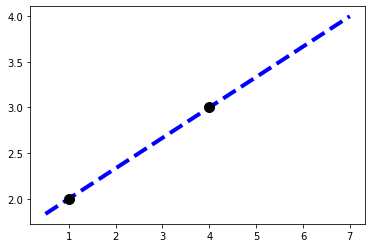

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

def lin_reg_2(x,y):
    return [(x[0]*y[1] - x[1]*y[0])/(x[0] - x[1]),(y[1] - y[0])/(x[1]-x[0])]

x_ = [1,4]
y_ = [2,3]
c,m = lin_reg_2(x_,y_)
print("p0 = ",[1,2], "p1 = ", [4,3])
print("c= ",c,"m= ", m)
intval = np.linspace(0.5,7,10)
plt.plot(intval,m*intval + c,'--', color = 'blue', linewidth = 4)
plt.plot(x_,y_,'o',color = 'black', markersize = 10)

plt.show()

Podemos utilizar a representação matricial para esses casos, onde temos :

$$y  = \begin{bmatrix}y_2 \\ y_2 \end{bmatrix}$$

$$p  = \begin{bmatrix}c \\ m \end{bmatrix}$$

e então definimos a matriz **A**, de forma que nossa equação fique da forma $y = Ap$:

$$y  = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \end{bmatrix}$$

e então, multiplicando pela matriz inversa:

$$A^{-1}y = A^{-1}Ap \Longrightarrow p = A^{-1}y$$



In [135]:
def lin_reg_matrix_2(x,y):
    A = np.matrix(([1,x[0]],[1,x[1]]))
    
    p = np.linalg.inv(A)*np.reshape(y,(2,1))
    
    return p

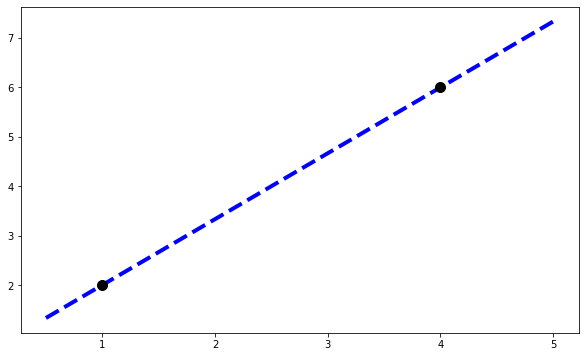

In [136]:
x_ = [1,4]
y_ = [2,6]
arg = lin_reg_matrix_2(x_,y_)
intval = np.linspace(0.5,5,10)
plt.plot(intval,arg[1,0]*intval + arg[0,0],'--', color = 'blue', linewidth = 4)
plt.plot(x_,y_,'o',color = 'black', markersize = 10)
#plt.show()

### Generalização

Por fim podemos generalizar e efetuar para um conjunto de **N** pontos $(x,y)$, para isso vamos definir as matrizes $A, A^T, p$ e $y$ dados os vetores $x$ e $y$.

$$
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
A  = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}
p = \begin{bmatrix} c \\ m \end{bmatrix}
$$

de modo que $A^T$

$$
A^T  = \begin{bmatrix} 1 & 1 & \cdots & 1\\ x_1 & x_2 \cdots & x_n  \end{bmatrix} $$

A equação que resolve o problema é $\vec{y} = A\vec{p}$, porém $A$ não é quadrada, então vamos multiplicar ambos os lados por $A^T$ resultando em

$$ A^T \vec{p} = A^T A \vec{y}$$

definindo $S = A^T A$ e $S^{-1} = (A^T A)^{-1}$ e multiplicando em ambos os lados da equação:

$$ S^-1 A^T \vec{y} = (A^TA)A^T\vec{y} = S^{-1}S \vec{p} = \vec{p}$$

por fim se definirmos $U = S^{-1}A^T = (A^TA)^{-1} A^T$, obtemos a equação geral:

$$\boxed{ \vec{p} = U \vec{y}}$$


Cujo erro é fornecido pela soma dos quadrados da diferença entre o ponto real e sua aproximação na reta encontrada, assim se definirmos $\delta = y_{lls}^i - y_i$, ficamos com:

$$\epsilon = \sum_{i=1}^{N} \delta^2 = \sum_{i=1}^{N} [(m \cdot x_i + c) - y_i]^2 $$

In [29]:
def LLS_linear(x,y):
    
    if (type(x) == list):
        x = np.array(x)
    if (type(y) == list):
        y = np.array(y)
    
    ''' 
    Função que aplica o método dos mínimos quadrados linear utilizando a forma matricial
    
    Input: 
        * 2 lista ou arrays numpy com os pontos x e y
    Output:
        * Retorna os coeficientes c e m da regressão linear, sua equação e o erro associado
        * Faz o plot dos pontos
    '''
    
    
    size = len(x)
    y = y.reshape(size,1)
    A = np.matrix((np.ones(size), x)).T
    U = np.linalg.inv(A.T*A)*A.T
    p = U*y
    
    delta = p[1,0]*x + p[0,0] - y.reshape(1,size)
    e = np.sum(delta**2)
    
    
    print('c = ', p[0,0], 'm = ', p[1,0], '\nEquation: y = ', p[0,0],'x','+ ', p[1,0])
    print('error = ', e/size)
    return [p[1,0],p[0,0]], e/size
    #fig,axs = plt.subplots()
    #plt.rcParams['figure.figsize'] = (10,6)
    
    #axs.plot(x,y,'o', color = 'black', markersize = 5)
    #axs.plot( x, p[1,0]*x + p[0,0], color = 'red')

In [30]:
val , erro = LLS_linear(np.random.random(7),np.array([1,3,5,2,6,5.5,5]))

c =  4.355065065664187 m =  -0.6974690783009558 
Equation: y =  4.355065065664187 x +  -0.6974690783009558
error =  3.1351895957897504


### Dados e LLS

In [2]:
import pandas as pd

In [10]:
df = pd.read_csv('Real-estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [117]:
col = df.columns
print([i for i in col])

['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


c =  42.43469704626294 m =  -0.25148841908534725 
Equation: y =  42.43469704626294 x +  -0.25148841908534725
error =  176.50047403131393
c =  45.85142705777496 m =  -0.007262051618149443 
Equation: y =  45.85142705777496 x +  -0.007262051618149443
error =  100.88574959799587
c =  27.181104781472442 m =  2.6376534634043733 
Equation: y =  27.181104781472442 x +  2.6376534634043733
error =  124.47199212769486


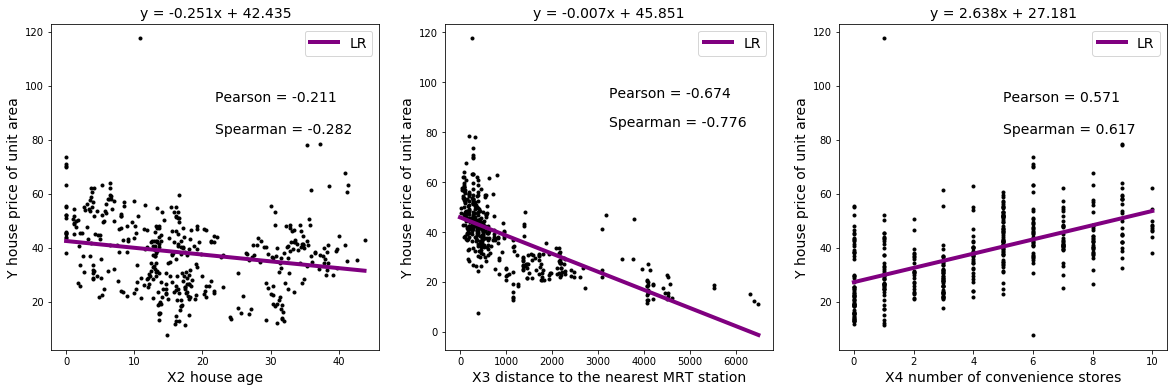

In [90]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
col = df.columns
from scipy.stats import pearsonr, spearmanr

for name, ax in zip(df.columns[2:5],axs.flat):
    
    ## Data points Plots
    ax.plot(df[name],df[col[-1]],'o', color = 'black', markersize = 3)
    
    ## Correlação
    corrp, pv_p = pearsonr(np.array(df[name]),np.array(df[col[-1]]))
    corrs, pv_s = spearmanr(np.array(df[name]),np.array(df[col[-1]]))
    ## Linear Regression
    p,erro = LLS_linear(np.array(df[name]),np.array(df[col[-1]]))
    x = np.linspace(0,df[name].max(), 30)
    ## Plot LR
    ax.plot(x, p[0]*x + p[1], linewidth = 4, label = 'LR', color = 'purple')
    
    ax.set_xlabel(name,fontsize = 14)
    ax.set_ylabel(col[-1], fontsize = 14)
    ax.legend(fontsize = 14)
    
    ax.set_title('y = {}x + {}'.format(np.round(p[0],3),np.round(p[1],3)), fontsize = 14)
    
    ax.text(0.5*x[-1], 0.8*df[col[-1]].max(),'Pearson = {}'.format(np.round(corrp,3)), fontsize = 14)
    ax.text(0.5*x[-1], 0.7*df[col[-1]].max(),'Spearman = {}'.format(np.round(corrs,3)), fontsize = 14)

In [115]:
X = np.log(np.array(df[col[3]].copy()))
Y = np.array(df[col[-1]].copy())

corr_p, _ = pearsonr(X,Y)

p, e = LLS_linear(X,Y)

c =  95.01686471224306 m =  -8.92353632285186 
Equation: y =  95.01686471224306 x +  -8.92353632285186
error =  85.09500497257886


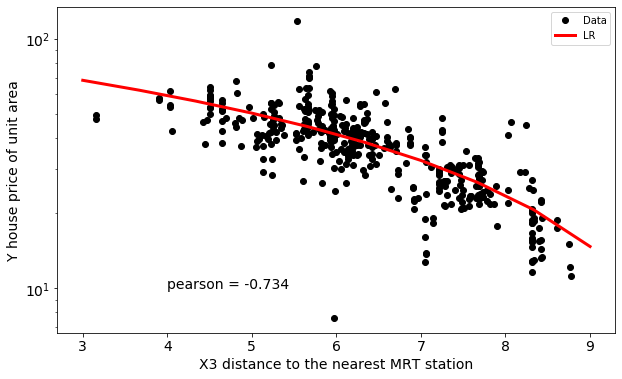

In [130]:
fig, axs = plt.subplots(figsize = (10,6))

string_p = 'pearson = {}'.format(np.round(corr_p,3))

x_ = np.linspace(3,9,10)
y_ = p[0]*x_ + p[1]
x_e = np.arange(3,10,1)
axs.plot(X,Y,'o', color = 'black', label = 'Data')
axs.plot(x_,y_,linewidth = 3, color = 'red', label = "LR")

axs.set_xlabel(col[3], fontsize = 14)
axs.set_ylabel(col[-1],fontsize = 14)
axs.set_yscale('log')

axs.text(4,10,string_p, fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()
    